In [34]:
import tweepy
import pandas as pd
import time
import re
import nltk

In [35]:
#!pip install -U nltk 

In [36]:
consumer_key = "UsOF1GK0VWWPdTGXRD40D3dm5"
consumer_secret = "3dxcVIYCwe71rydA3n8ZvPLIQyqGbGwP3uHaqmc1pDM6z1bGyz"
access_token = "1440852507522048004-0C8wfUUQzX778dZ1qsDGUywwhZXcFQ"
access_token_secret = "UALeQzrHQQVtDpdViDvZRBjht4G2DyLET7oifV4VfxO2I"

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth,wait_on_rate_limit=True)

In [37]:
#method for searching and fetching user details
user = api.get_user(screen_name = "JoeBiden")

In [38]:
#list of attributes in user
dir(user)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_api',
 '_json',
 'contributors_enabled',
 'created_at',
 'default_profile',
 'default_profile_image',
 'description',
 'entities',
 'favourites_count',
 'follow',
 'follow_request_sent',
 'follower_ids',
 'followers',
 'followers_count',
 'following',
 'friends',
 'friends_count',
 'geo_enabled',
 'has_extended_profile',
 'id',
 'id_str',
 'is_translation_enabled',
 'is_translator',
 'lang',
 'list_memberships',
 'list_ownerships',
 'list_subscriptions',
 'listed_count',
 'lists',
 'location',
 'name',
 'notifications',
 'parse',
 'parse_list',
 'profile_background_color',
 'profile_backgr

In [39]:
print("User Details:")
print("")
print("Name: " + str(user.name))
print("Description: " + str(user.description))
print("Location: " + str(user.location))
print("Created at: " + str(user.created_at))
print("Screen Name: " + str(user.screen_name))
print("User ID: " + str(user.id))
print("")
print("Social Network Information:")
print("")
print("Followers Count: " + str(user.followers_count))
print("Friends Count: " + str(user.friends_count))

User Details:

Name: Joe Biden
Description: Husband to @DrBiden, proud father and grandfather. Ready to build back better for all Americans. Official account is @POTUS.
Location: Washington, DC
Created at: 2007-03-11 17:51:24+00:00
Screen Name: JoeBiden
User ID: 939091

Social Network Information:

Followers Count: 31429184
Friends Count: 48


In [40]:
user_info = [[user.id, user.name, user.description, user.location, user.followers_count]]
user_df = pd.DataFrame(user_info, columns = ['User ID', 'Name', 'Description', 'Location', 'Follower Count'])

In [41]:
user_df.head()

,User ID,Name,Description,Location,Follower Count
0,939091,Joe Biden,"Husband to @DrBiden, proud father and grandfat...","Washington, DC",31429184


In [42]:
user_df.to_csv('{}-info.csv'.format(user.name), sep=',', index = False)

In [43]:
#Replace URLs found in a text string with nothing
def remove_url(txt): 
     return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", txt).split())

In [44]:
name = "JoeBiden"
tweetcount = 200
tweets_list = []

# Calling the user_timeline function with our parameters
tweets = api.user_timeline(screen_name=name, count=tweetcount, tweet_mode='extended')

# foreach through all tweets pulled
for tweet in tweets:
    try:    
        tweets_list.append([tweet.id, remove_url(tweet.full_text), tweet.retweet_count, tweet.retweeted_status.favorite_count])
    except:
        tweets_list.append([tweet.id, remove_url(tweet.full_text), tweet.retweet_count, tweet.favorite_count])

tweets_df = pd.DataFrame(tweets_list, columns = ['Tweet ID', 'Text', 'Retweet Count', 'Like Count'])
# add the covid-19 in filter to extract both keywords since duplicates will be drop in the next line
tweets_filter = tweets_df[tweets_df['Text'].str.contains('vaccinated', 'covid-19')]

In [45]:
# drop_duplicates to filter by the tweet id column and remove duplicates
tweets_filter.drop_duplicates(subset=['Text'], keep=False)
# added the to_string() to print out the whole thing for easier viewing
print(tweets_filter.to_string())

                Tweet ID                                                                                                                                                                                                                                                                         Text  Retweet Count  Like Count
13   1442617142222917633                                                                                                                 Today I got my COVID19 booster shotand just like my first and second dose it was safe and easy Get vaccinated Together can we save lives and beat this virus           3974       44731
18   1442272522775400448                                                       Over 182 million Americans have already done the right thing and are fully vaccinated as of today To the other 70 million eligible Americans who have yet to get their first shot get vaccinated It can save your life           2274       14513
22   1442146441993064449             

In [46]:
# Converting dataframe to CSV 
tweets_filter.to_csv('{}-tweets.csv'.format(name), sep=',', index = False)

In [47]:
words_in_tweet = [Text.lower().split() for Text in tweets_filter.Text]

In [48]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/tonygao/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [49]:
stop_words = set(stopwords.words('english')) #list of stopwords
print(stop_words)

{'she', 'd', "doesn't", 'now', 'most', 'nor', "she's", 'into', 'while', 'more', 'you', 'above', 'other', 'our', "should've", 'did', 'through', 'some', 'shouldn', 'couldn', 'once', 'hadn', 'herself', 'ain', 'if', 'we', "you'd", 'haven', 'because', 'during', 'what', 'your', 'a', 'ma', 'again', 'it', 'hasn', 'are', "haven't", 'below', 'off', 'such', 'wouldn', 'the', 'this', 'myself', "don't", 'needn', 'from', 'out', "wouldn't", 'mightn', 'themselves', 'as', 'should', "hasn't", 'were', 'aren', 'wasn', 'he', 'how', 'i', 'yourself', 'is', 'when', 'ourselves', 'me', 'doing', 'same', 'after', 'few', 'his', 'them', "didn't", 'in', 'where', 'y', "aren't", 'isn', 'of', 'has', 'that', 'yours', 'then', 's', 'its', 'had', 'can', 'theirs', 'do', 'whom', 'does', 'mustn', 'just', "you'll", 'before', 'll', 'not', 'weren', 'up', 'o', 'her', "weren't", 'here', "won't", 'shan', 'was', "you've", "needn't", 'very', "mightn't", 'didn', "isn't", 'at', 'each', "wasn't", 'doesn', "shouldn't", 'both', 'only', 'ag

In [50]:
import itertools
import collections

tweets_nsw = [[word for word in tweet_words if not word in stop_words]
              for tweet_words in words_in_tweet]

all_words = list(itertools.chain(*tweets_nsw))  #import libary itertools to flatten the list into 1 list

# Create counter
counts_words = collections.Counter(all_words)  #import library collections collection "Counter" object 

counts_words.most_common(15) #return the most commonly used words and the number of times that they are used.

[('vaccinated', 25),
 ('get', 20),
 ('covid19', 8),
 ('rt', 8),
 ('potus', 8),
 ('fully', 6),
 ('shot', 6),
 ('americans', 5),
 ('delta', 5),
 ('variant', 5),
 ('booster', 4),
 ('virus', 4),
 ('dont', 4),
 ('folks', 4),
 ('free', 4)]

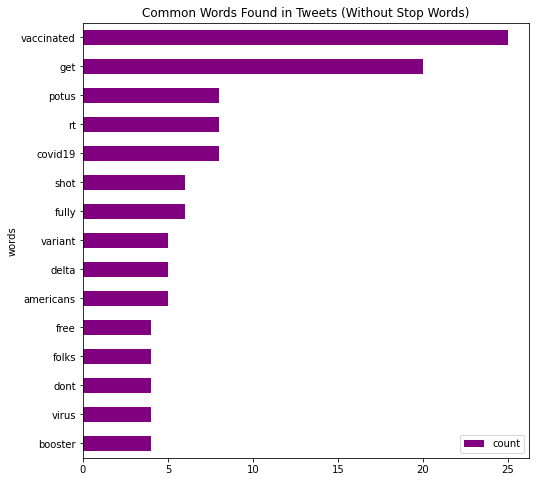

In [51]:
import matplotlib.pyplot as plt
clean_tweets_nsw = pd.DataFrame(counts_words.most_common(15),
                             columns=['words', 'count'])

fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
clean_tweets_nsw.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="purple")

ax.set_title("Common Words Found in Tweets (Without Stop Words)")

plt.show()

In [52]:
dir(tweet)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_api',
 '_json',
 'author',
 'contributors',
 'coordinates',
 'created_at',
 'destroy',
 'display_text_range',
 'entities',
 'favorite',
 'favorite_count',
 'favorited',
 'full_text',
 'geo',
 'id',
 'id_str',
 'in_reply_to_screen_name',
 'in_reply_to_status_id',
 'in_reply_to_status_id_str',
 'in_reply_to_user_id',
 'in_reply_to_user_id_str',
 'is_quote_status',
 'lang',
 'parse',
 'parse_list',
 'place',
 'retweet',
 'retweet_count',
 'retweeted',
 'retweeted_status',
 'retweets',
 'source',
 'source_url',
 'truncated',
 'user']